<a href="https://colab.research.google.com/github/Nick-Boddy/GeolocRAG/blob/main/Navig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/Navig'

/content/drive/MyDrive/Navig


In [3]:
%pwd

'/content/drive/MyDrive/Navig'

In [ ]:
#!git clone https://github.com/SparrowZheyuan18/Navig.git

Cloning into 'Navig'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 51 (delta 20), reused 23 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (51/51), 17.64 MiB | 10.47 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [4]:
#!pip install datasets
#!pip install datasets[vision]

In [5]:
# import os
# from datasets import load_dataset
# cache_path = "/content/drive/MyDrive/Navig/cache"
# os.makedirs(cache_path, exist_ok=True)
# hf_dataset = load_dataset("huggingCode11/NAVICLUES", cache_dir=cache_path)
# hf_dataset.save_to_disk("/content/drive/MyDrive/Navig/data")

In [ ]:
#!pip install huggingface_hub[hf_transfer]

In [13]:
# download grounding DINO for grounding object detection boxes around
# the images
#!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd GroundingDINO
!pip install -e .

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Total 463 (delta 0), reused 0 (delta 0), pack-reused 463 (from 1)
Receiving objects: 100% (463/463), 12.91 MiB | 6.99 MiB/s, done.
Resolving deltas: 100% (220/220), done.
/content/drive/MyDrive/Navig/data/guidebook/GroundingDINO
Obtaining file:///content/drive/MyDrive/Navig/data/guidebook/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 18.8 MB/s eta 0:00:00
  Running setup.py develop for groundingdino


In [ ]:
from types import CoroutineType
from datasets.table import read_schema_from_file
from IPython.core.compilerop import check_linecache_ipython
python evaluation.py\
-- model $model_index_to_eval_results
--model_index_to_eval_results \
-- check_linecache_ipython \
-- dataset_path $dataset_path \
--reasoning_path $reasoning_path \
--results_file_Name $results_file_name \
--

In [ ]:
# install Qwen2.5vL instruct
!pip install git+https://github.com/huggingface/transformers accelerate

In [ ]:
from huggingface_hub import hf_hub_download, list_repo_files
import os
import shutil

# Set local storage folder
LOCAL_DIR = "/content/drive/MyDrive/Navig/data"
os.makedirs(LOCAL_DIR, exist_ok=True)

REPO = "huggingCode11/NAVICLUES"


files = list_repo_files(repo_id=REPO, repo_type="dataset")

print(f"Found {len(files)} files in NAVICLUES repo.")

for f in files:
    local_path = os.path.join(LOCAL_DIR, f.replace("/", "_"))  # flatten folders
    if not os.path.exists(local_path):
        print(f"Downloading {f} -> {local_path}")
        hf_hub_download(repo_id = REPO, filename= f, repo_type="dataset", local_dir=LOCAL_DIR, local_dir_use_symlinks=False)
    else:
        print(f"Already exists: {local_path}")


Found 16 files in NAVICLUES repo.


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:979: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


.gitattributes: 0.00B [00:00, ?B/s]

README.md:   0%|          | 0.00/192 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/145 [00:00<?, ?B/s]

guidebook/faiss_index.index:   0%|          | 0.00/12.9M [00:00<?, ?B/s]

guidebook/image_features.npy:   0%|          | 0.00/12.9M [00:00<?, ?B/s]

image_paths.txt: 0.00B [00:00, ?B/s]

text_descriptions.txt: 0.00B [00:00, ?B/s]

In [12]:
%cd /content/drive/MyDrive/Navig/data/guidebook/


/content/drive/MyDrive/Navig/data/guidebook


In [16]:
#!unzip plonkit_images.zip

In [ ]:
#vision RAG pipeline
import torch
import base64
from PIL import Image

#convert images to base64
def convert_image_to_base64(image_path):
  with open(image_path, "rb") as image_file:
    base64_image = base64.b64encode(image_file.read())
  return base64_image

#embed the documents
def encode_documents(documents):
  #encode the documents
  image_embedding = embedding_model.encode(documents)
  return image_embedding

#embed the query
def encode_query(query):
  query_embedding = embedding_model.encode(query)
  return query_embedding

#vector search
result = vector_db.search(query_emb, image_embedding, top_k = 5)

#Ask the vision LLM

answer = llm.generate(
    prompt = f""
)
# do this for multiple images in guidebook

In [22]:
!python inference.py --model "cpm" --image_path "/content/drive/MyDrive/Navig/data/guidebook/plonkit_images/

Ablation.py      evaluation.py   guidebook/    llm.py      prompts.py  rouge.py
environment.txt  GroundingDINO/  inference.py  NaviClues/  README.md   utils.py


In [24]:
!unzip /content/drive/MyDrive/Navig/data/NaviClues/NaviClues-images.zip

Streaming output truncated to the last 5000 lines.
   creating: images/images_geopeter/RRa1BBHMOPknADge/4/180/
  inflating: images/images_geopeter/RRa1BBHMOPknADge/4/180/metadata.json  
  inflating: images/images_geopeter/RRa1BBHMOPknADge/4/180/gsv_0.jpg  
   creating: images/images_geopeter/RRa1BBHMOPknADge/4/270/
  inflating: images/images_geopeter/RRa1BBHMOPknADge/4/270/metadata.json  
  inflating: images/images_geopeter/RRa1BBHMOPknADge/4/270/gsv_0.jpg  
   creating: images/images_geopeter/RRa1BBHMOPknADge/4/0/
  inflating: images/images_geopeter/RRa1BBHMOPknADge/4/0/metadata.json  
  inflating: images/images_geopeter/RRa1BBHMOPknADge/4/0/gsv_0.jpg  
  inflating: images/images_geopeter/RRa1BBHMOPknADge/4/combined.jpg  
   creating: images/images_geopeter/RRa1BBHMOPknADge/1/
   creating: images/images_geopeter/RRa1BBHMOPknADge/1/90/
  inflating: images/images_geopeter/RRa1BBHMOPknADge/1/90/metadata.json  
  inflating: images/images_geopeter/RRa1BBHMOPknADge/1/90/gsv_0.jpg  
   creat

In [7]:
!pip install clip
!pip install retry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 2.9 MB/s eta 0:00:00


In [10]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 82.9 MB/s eta 0:00:00


In [ ]:
#working on the retrival
#
import clip
import faiss
import numpy as np
def retrieve_similar_images(input_image_path, k=5, threshold=30):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-B/32", device=device)

    image_features_array = np.load("guidebook/image_features.npy")
    index = faiss.read_index("guidebook/faiss_index.index")

    with open("guidebook/text_descriptions.txt", "r", encoding='utf-8') as f:
        text_descriptions = [line.strip() for line in f.readlines()]

    with open("guidebook/image_paths.txt", "r", encoding='utf-8') as f:
        image_paths = [line.strip() for line in f.readlines()]
    input_image = preprocess(Image.open(input_image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        input_image_features = model.encode_image(input_image).cpu().numpy()
    input_image_features = input_image_features.astype('float32')
    distances, indices = index.search(input_image_features, k)

    filtered_similar_texts = []
    filtered_similar_images = []
    filtered_distances = []

    for i, distance in enumerate(distances[0]):
        if threshold is None or distance < threshold:
            filtered_similar_texts.append(text_descriptions[indices[0][i]])
            filtered_similar_images.append(image_paths[indices[0][i]])
            filtered_distances.append(float(distance))

    if not filtered_similar_images:
        return [], [], []
    # print(filtered_similar_images, filtered_similar_texts, filtered_distances)
    return filtered_similar_images, filtered_similar_texts, filtered_distances

In [ ]:
#get RAG


def getRAG(data):
  print("Retriving")
  retrived_dict = {}
  for row in data:
    results = retrieve_similar_images(input_image_path=row['image_path'], threshold=40)
    retrived_dict["similar_images"] = results[0]
    retrived_dict["similar_texts"] = results[1]
    retrived_dict["distances"] = results[2]
    retrived_dict[row['id']] = row
  return retrived_dict


In [ ]:
def generate_response(query, retrived_dict):
  generat_prompt = """
  Using the provided information as a reference, estimate the location depicted in the image with as much accuracy and precision as possible. Aim to deduce the exact coordinates whenever feasible. Format your response strictly as JSON in the following structure:{
    "country": "<country_name>",
    "city": "<city_name>",
    "latitude": <Latitude Coordinate>,
    "longitude": <Longitude Coordinate>
    }
   Ensure the JSON output is correctly formatted. Provide a well-informed estimate for each value, avoiding any empty fields. Do not include additional information or commentary.
  """

  base_query =





In [9]:
%cd models

/content/drive/MyDrive/Navig/models


In [12]:
# !git clone https://www.modelscope.cn/models/linglingdan/MiniCPM-V_2_6_awq_int4
# !git clone https://github.com/LDLINGLINGLING/AutoAWQ.git
# !cd AutoAWQ
# !pip install e .

In [15]:
!git clone https://<huggingfaceusername>:<huggingfacetoken>@huggingface.co/openbmb/MiniCPM-V-2_6

Cloning into 'MiniCPM-V-2_6'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 174 (delta 96), reused 0 (delta 0), pack-reused 3 (from 1)
Receiving objects: 100% (174/174), 3.68 MiB | 3.60 MiB/s, done.
Resolving deltas: 100% (96/96), done.
Updating files: 100% (24/24), done.
Filtering content: 100% (5/5), 3.08 GiB | 5.16 MiB/s, done.
fatal: cannot exec '/content/drive/MyDrive/Navig/models/MiniCPM-V-2_6/.git/hooks/post-checkout': Permission denied
Encountered 3 file(s) that may not have been copied correctly on Windows:
	model-00003-of-00004.safetensors
	model-00001-of-00004.safetensors
	model-00002-of-00004.safetensors

See: `git lfs help smudge` for more details.


In [ ]:
!pip install retry

In [15]:
%cd /content/drive/MyDrive/Navig/Navig

/content/drive/MyDrive/Navig/Navig


In [16]:
!python inference.py \
   --model "cpm" \
   --image_path "/content/drive/MyDrive/Navig/data/inferenceImages/110.png"\
   --crop_box_threshold 0.3\
   --crop_text_threshold 0.25\
  --model_path "/content/drive/MyDrive/Navig/Navig/models/MiniCPM-V-2_6"

2025-12-04 20:54:08.697072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764881648.716605    1967 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764881648.722060    1967 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764881648.738706    1967 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764881648.738772    1967 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764881648.738777    1967 computation_placer.cc:177] computation placer alr

In [ ]:
from PIL import Image

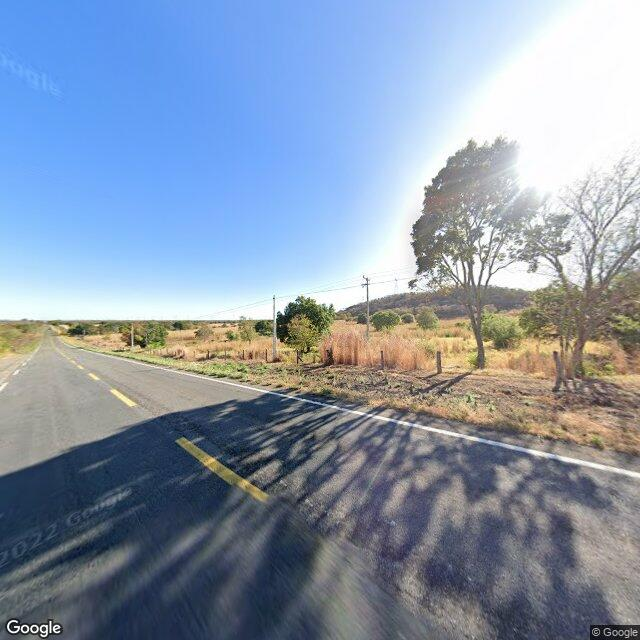

In [32]:
display(Image.open("/content/drive/MyDrive/Navig/data/inferenceImages/110.png"))

In [60]:
!pip install ms-swift==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 4.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of trl to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of trl to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 77.3 MB/s eta

In [5]:
!pip install clip

  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-0.2.0-py3-none-any.whl size=6989 sha256=7b83817df677fe745694897400778add8cd4edbd95580123262e521c33fa59c5
  Stored in directory: /root/.cache/pip/wheels/6c/fd/54/9d4e15cf829b871199a7cd3597e869a514d1624a0a43076896
Successfully built clip
